<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/magdiplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import imutils

print(tf.__version__)

2.15.0


In [ ]:
video_path = '/content/drive/MyDrive/diplom/IMG_1785.MOV'
result_save_path = '/content/drive/MyDrive/diplom/videoCapture/door/'

capture = cv2.VideoCapture(video_path)
frame_rate = 5
frame_id = 0
success, frame = capture.read()
while success:
    if frame_id % frame_rate == 0:
        frame_name = os.path.join(result_save_path, f'door{frame_id}.jpg')
        cv2.imwrite(frame_name, frame)
    success, frame = capture.read()
    frame_id += 1
capture.release()

In [2]:
def preprocess_laplacian (img, lap_ksize):
  img300 = resizeImage(300,300,img)
  imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=100, sigma_r=0.3)
  imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
  imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=lap_ksize)
  return imgLap

In [71]:
def preprocess_Canny (img, t_l, t_u):
  img300 = resizeImage(300,300,img)
  imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=100, sigma_r=0.3)
  imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
  imgCan = cv2.Canny(imgGray,t_l,t_u)
  return imgCan

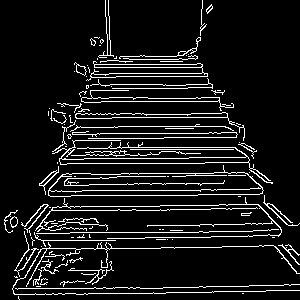

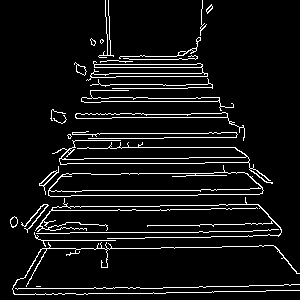

In [15]:
img_path = '/content/drive/MyDrive/diplom/videoCapture/stair2129.jpg'
img = cv2.imread(img_path)
img = resizeImage(300, 300, img)
imgEdge = cv2.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.2)
imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=3)
# cv2_imshow(imgLap)

# imgLap5 = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
# cv2_imshow(imgLap5)

# imgLap7 = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=7)
# cv2_imshow(imgLap7)

imgCanny2 = cv2.Canny(imgGray,10,50)
cv2_imshow(imgCanny2)
imgCanny3 = cv2.Canny(imgGray,10,250)
cv2_imshow(imgCanny3)
# imgCanny4 = cv2.Canny(imgGray,100,250)
# cv2_imshow(imgCanny4)

In [4]:
# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
# project = rf.workspace("research-xvh79").project("window-detection-vnpow")
# dataset = project.version(1).download("coco")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Window-detection-1 in coco:: 100%|██████████| 4848/4848 [00:01<00:00, 2956.31it/s]


In [9]:
import shutil

for file1 in os.listdir('/content/Window-detection-1/train'):
  if(file1.endswith('.json')):
    save_path = '/content/drive/MyDrive/diplom/'
    shutil.move(os.path.join('/content/Window-detection-1/train',file1), save_path)

In [72]:
def getImageNameByImageId (images, id):
  for el in images:
    if(el['id']==id):
      return el['file_name']

In [8]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

In [104]:
PATH_TO_SAVE_PREPROC_WINDOWS = '/content/drive/MyDrive/diplom/preprocTest/canny_10_50/window/'
PATH_TO_SAVE_PREPROC_STAIRS = '/content/drive/MyDrive/diplom/preprocTest/canny_10_50/stair/'
PATH_TO_SAVE_PREPROC_DOORS = '/content/drive/MyDrive/diplom/preprocTest/canny_10_50/door/'

In [105]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
# project = rf.workspace("shixi-rqywi").project("stairsdetect-for-blinders")
# dataset = project.version(7).download("coco")
import json

# path_to_valid_windows = "/content/Window-detection-1/valid/*"
# path_to_train_windows = "/content/Window-detection-1/train/*"
# path_to_test_windows = "/content/Window-detection-1/test/*"

f = open('/content/drive/MyDrive/diplom/_annotations.coco.json')
data = json.load(f)
# path = '/content/drive/MyDrive/diplom/rfProcessedImages/window/'
img_path = "/content/Window-detection-1/train/"
i=0
for annotation in data['annotations']:
  image_id = annotation['image_id']
  bbox = annotation['bbox']
  x1=int(bbox[0])
  y1=int(bbox[1])
  w=int(bbox[2])
  h=int(bbox[3])
  filename = getImageNameByImageId(data['images'],image_id)
  img = cv2.imread(img_path+filename)

  cropped_image = img[y1:y1+h, x1:x1+w]

  border_size = 20
  border = cv2.copyMakeBorder(
      cropped_image,
      top=border_size,
      bottom=border_size,
      left=border_size,
      right=border_size,
      borderType=cv2.BORDER_CONSTANT,
      value=[128,128,128]
  )
  # pp_image = preprocess_laplacian(border,7)
  pp_image = preprocess_Canny(border,10,50)

  cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_WINDOWS , 'window'+str(i)+'.jpg'), pp_image)
  i+=1
  print(i)


# all_img_paths = glob.glob(path_to_valid_windows)
# # path = '/content/drive/MyDrive/diplom/test/validWindows/'
# i=0
# for img_path in all_img_paths:
#   if(img_path.endswith(".jpg")):
#     img = cv2.imread(img_path)
#     pp_image = preprocess_laplacian(img,3)
#     cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_WINDOWS , 'window'+str(i)+'.jpg'), pp_image)
#     i+=1
# print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [106]:
# двери
# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
# project = rf.workspace("miguel-ortiz").project("door_cls")
# dataset = project.version(3).download("folder")

path_to_valid_doors = "/content/door_cls-3/valid/door_cls/*"
path_to_train_doors = "/content/door_cls-3/train/door_cls/*"
path_to_test_doors = "/content/door_cls-3/test/door_cls/*"

all_img_paths = glob.glob(path_to_valid_doors)
i=0
for img_path in all_img_paths:
  if(img_path.endswith(".jpg")):
    img = cv2.imread(img_path)
    pp_image = preprocess_Canny(img,10,50)
    cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_DOORS , 'door'+str(i)+'.jpg'), pp_image)
    i+=1
print(i)

all_img_paths = glob.glob(path_to_train_doors)
i=i+1
for img_path in all_img_paths:
  if(img_path.endswith(".jpg")):
    img = cv2.imread(img_path)
    pp_image = preprocess_Canny(img,10,50)
    cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_DOORS , 'door'+str(i)+'.jpg'), pp_image)
    i+=1
print(i)

all_img_paths = glob.glob(path_to_test_doors)
i=i+1
for img_path in all_img_paths:
  if(img_path.endswith(".jpg")):
    img = cv2.imread(img_path)
    pp_image = preprocess_Canny(img,10,50)
    cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_DOORS , 'door'+str(i)+'.jpg'), pp_image)
    i+=1
print(i)


126
609
678


In [107]:
# Лестницы
# from roboflow import Roboflow
# rf = Roboflow(api_key="KlfuZxqMCfq22KG6TKdR")
# project = rf.workspace("shixi-rqywi").project("stairsdetect-for-blinders")
# dataset = project.version(7).download("coco")

path_to_valid_stairs = "/content/STAIRSdetect-FOR-blinders-7/valid/*"
path_to_train_stairs = "/content/STAIRSdetect-FOR-blinders-7/train/*"
path_to_test_stairs = "/content/STAIRSdetect-FOR-blinders-7/test/*"

all_img_paths = glob.glob(path_to_valid_stairs)
i=0
for img_path in all_img_paths:
  if(img_path.endswith(".jpg")):
    img = cv2.imread(img_path)
    pp_image = preprocess_Canny(img,10,50)
    cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_STAIRS , 'stair'+str(i)+'.jpg'), pp_image)
    i+=1
print(i)

all_img_paths = glob.glob(path_to_train_stairs)
i=i+1
for img_path in all_img_paths:
  if(img_path.endswith(".jpg")):
    img = cv2.imread(img_path)
    pp_image = preprocess_Canny(img,10,50)
    cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_STAIRS , 'stair'+str(i)+'.jpg'), pp_image)
    i+=1
print(i)

all_img_paths = glob.glob(path_to_test_stairs)
i=i+1
for img_path in all_img_paths:
  if(img_path.endswith(".jpg")):
    img = cv2.imread(img_path)
    pp_image = preprocess_Canny(img,10,50)
    cv2.imwrite(os.path.join(PATH_TO_SAVE_PREPROC_STAIRS , 'stair'+str(i)+'.jpg'), pp_image)
    i+=1
print(i)

248
2441
2583


In [ ]:
# окна
# import json
# f = open('/content/drive/MyDrive/diplom/_annotations.coco.json')
# data = json.load(f)
# path = '/content/drive/MyDrive/diplom/rfProcessedImages/window/'
# img_path = "/content/Window-detection-1/train/"
# i=0
# for annotation in data['annotations']:
#   image_id = annotation['image_id']
#   bbox = annotation['bbox']
#   x1=int(bbox[0])
#   y1=int(bbox[1])
#   w=int(bbox[2])
#   h=int(bbox[3])
#   filename = getImageNameByImageId(data['images'],image_id)
#   img = cv2.imread(img_path+filename)

#   cropped_image = img[y1:y1+h, x1:x1+w]

#   border_size = 20
#   border = cv2.copyMakeBorder(
#       cropped_image,
#       top=border_size,
#       bottom=border_size,
#       left=border_size,
#       right=border_size,
#       borderType=cv2.BORDER_CONSTANT,
#       value=[128,128,128]
#   )

#   img300 = resizeImage(300,300,border)
#   imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=100, sigma_r=0.3)
#   imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
#   imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
#   cv2.imwrite(os.path.join(path , 'window'+str(i)+'.jpg'), imgLap)
#   i+=1
#   print(i)


# import json
# f = open('/content/drive/MyDrive/diplom/_annotations.coco.json')
# data = json.load(f)
# path = '/content/drive/MyDrive/diplom/colorImages/window/'
# img_path = "/content/Window-detection-1/train/"
# i=0
# for i in range(1000):
#   annotation = data['annotations'][i]
#   image_id = annotation['image_id']
#   filename = getImageNameByImageId(data['images'],image_id)
#   img = cv2.imread(img_path+filename)
#   cv2.imwrite(os.path.join(path , 'window'+str(i)+'.jpg'), img)
#   i+=1
#   print(i)

In [108]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

In [ ]:
# all_img_paths = glob.glob("/content/drive/MyDrive/diplom/photos/angles/*")
# path = '/content/drive/MyDrive/diplom/readyImg/angle/'
# i=0
# print(len(all_img_paths))
# for img_path in all_img_paths:
#   img = cv2.imread(img_path)
#   img300 = resizeImage(300,300,img)
#   imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
#   imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
#   imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
#   # img64 = imutils.resize(imgLap, width=64,height=64)
#   # cv2_imshow(img64)
#   cv2.imwrite(os.path.join(path , 'angle'+str(i)+'.jpg'), imgLap)
#   i+=1
#   flip = cv2.flip(imgLap,1)
#   cv2.imwrite(os.path.join(path , 'angle'+str(i)+'.jpg'), flip)
#   i+=1

# img_path = '/content/drive/MyDrive/diplom/photos/doors/IMG_1840_126.jpg'

# img = cv2.imread(img_path)
# img300 = resizeImage(300,300,img)
# cv2_imshow(img300)
# image = cv2.flip(img300,1)
# cv2_imshow(image)
# imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
# imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
# cv2_imshow(imgEdge)
# imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
# cv2_imshow(imgLap)
# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)
# cv2_imshow(cv2.flip(img64,1))


# # img64 = resizeImage(64,64,imgLap)
# # cv2_imshow(img64)


# resized = imutils.resize(imgLap, width=64,height=64)
# cv2_imshow(resized)

333


In [109]:
IMG_SIZE = 64
# DATADIR = "/content/drive/MyDrive/diplom/colorImages/"
DATADIR = "/content/drive/MyDrive/diplom/preprocTest/canny_10_50/"

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   DATADIR,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(IMG_SIZE, IMG_SIZE),
#   batch_size=5)
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=5)
class_names = train_ds.class_names
print(class_names)

Found 4792 files belonging to 3 classes.
Using 3834 files for training.
['door', 'stair', 'window']


In [110]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   DATADIR,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(IMG_SIZE, IMG_SIZE),
#   batch_size=5)
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=5)


Found 4792 files belonging to 3 classes.
Using 958 files for validation.


In [112]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# рабочее для цветных изображений

# class_names = train_ds.class_names
# print(class_names)
# data_augmentation = keras.Sequential(
#   [
#     layers.RandomFlip("horizontal",
#                       input_shape=(IMG_SIZE,
#                                   IMG_SIZE,
#                                   3)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#   ]
# )

# num_classes = len(class_names)

# model = models.Sequential()
# model.add(data_augmentation),
# model.add(layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3))),
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(num_classes))
# model.add(layers.Activation("softmax"))


class_names = train_ds.class_names
print(class_names)
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(IMG_SIZE,
                                  IMG_SIZE,
                                  1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

num_classes = len(class_names)

model = models.Sequential()
model.add(data_augmentation),
model.add(layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1))),
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation("softmax"))

['door', 'stair', 'window']


In [113]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 64, 64, 1)         0         
                                                                 
 rescaling_6 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                               

In [118]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [119]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss',min_delta=0.01,
                           patience=2),
             ModelCheckpoint('/content/drive/MyDrive/diplom/preprocTestModels/canny_10_50/model_checkpoint.keras',
                             save_best_only=True)]

In [120]:
# epochs=2
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

history = model.fit(
  train_ds,
  epochs=15,
  validation_data=val_ds,
  callbacks = callbacks
)

Epoch 1/15
767/767 [==============================] - 61s 77ms/step - loss: 0.6597 - accuracy: 0.7220 - val_loss: 0.5070 - val_accuracy: 0.8100
Epoch 2/15
767/767 [==============================] - 51s 66ms/step - loss: 0.4477 - accuracy: 0.8179 - val_loss: 0.4669 - val_accuracy: 0.8194
Epoch 3/15
767/767 [==============================] - 54s 70ms/step - loss: 0.3980 - accuracy: 0.8425 - val_loss: 0.4467 - val_accuracy: 0.8309
Epoch 4/15
767/767 [==============================] - 51s 66ms/step - loss: 0.3713 - accuracy: 0.8558 - val_loss: 0.4681 - val_accuracy: 0.8434
Epoch 5/15
767/767 [==============================] - 52s 67ms/step - loss: 0.3460 - accuracy: 0.8589 - val_loss: 0.4441 - val_accuracy: 0.8528


In [121]:
import pandas as pd
import numpy as np
path_to_save = '/content/drive/MyDrive/diplom/preprocTestModels/canny_10_50/'
path_to_save_history = path_to_save+'history_canny_10_50.npy'
np.save(path_to_save_history,history.history)
model.save(path_to_save+'model_canny_10_50.keras')

<Axes: >

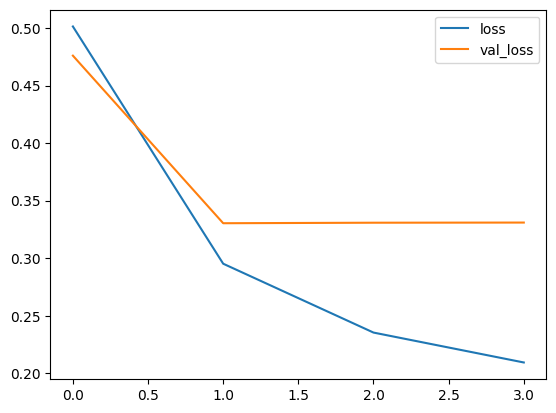

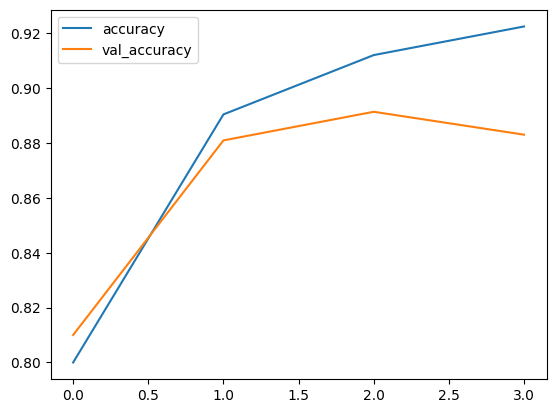

In [69]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['accuracy','val_accuracy']].plot()

<Axes: >

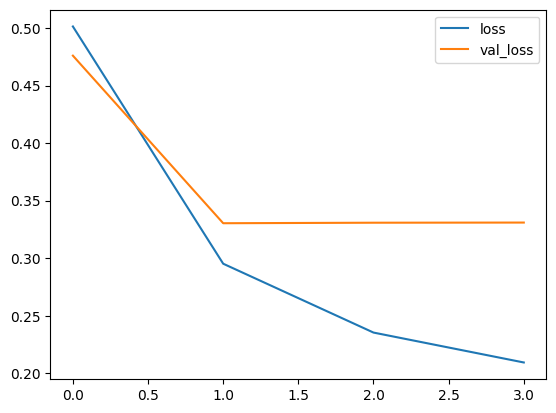

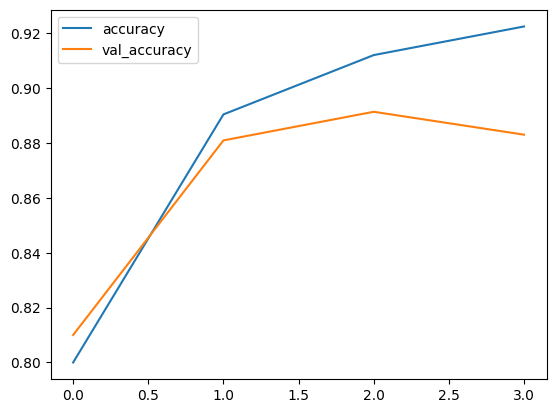

In [70]:
history_loaded =np.load(path_to_save_history,allow_pickle='TRUE').item()
history_frame_loaded = pd.DataFrame(history_loaded)
history_frame_loaded.loc[:,['loss','val_loss']].plot()
history_frame_loaded.loc[:,['accuracy','val_accuracy']].plot()

In [124]:
DATADIR = '/content/drive/MyDrive/diplom/preprocTest/laplac_ksize5/'
test_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.1,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(64, 64),
  batch_size=1)

model = tf.keras.models.load_model('/content/drive/MyDrive/diplom/preprocTestModels/laplac_ksize5/model_lap_ksize5.keras')
result_test = model.evaluate(test_ds)

Found 4805 files belonging to 3 classes.
Using 480 files for validation.
480/480 [==============================] - 22s 45ms/step - loss: 0.2056 - accuracy: 0.9354


In [132]:
class_names = test_ds.class_names
class_names

['door', 'stair', 'window']

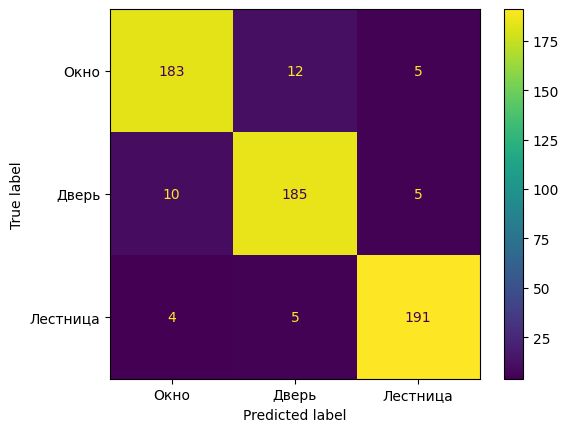

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
# y_true = np.concatenate([y for x, y in test_ds], axis=0)
# y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

cm = np.array([[183, 12, 5],
               [10, 185, 5],
               [4, 5, 191]])
# cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Окно', 'Дверь', 'Лестница'])
disp.plot()
# plt.title('Confusion Matrix')
# plt.show()

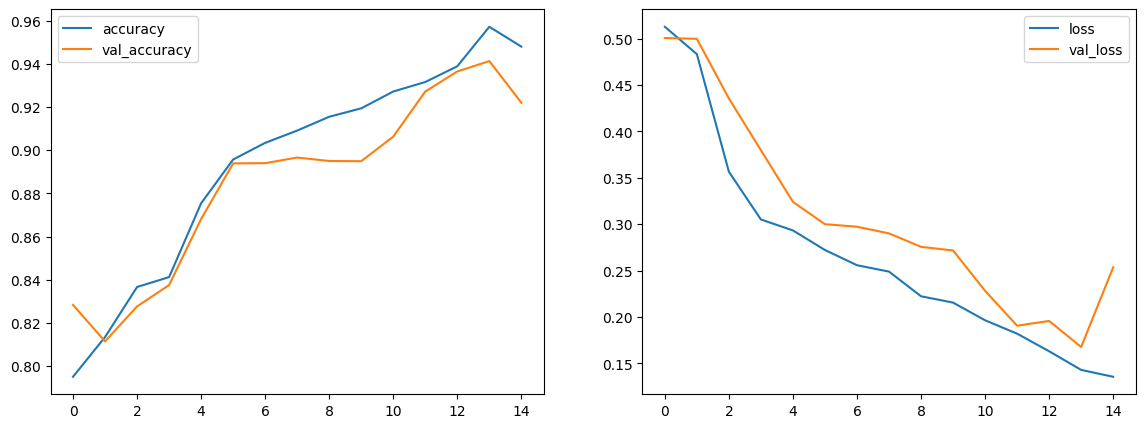

In [138]:
import matplotlib.pyplot as plt

# Пример данных истории обучения
history = {
    'accuracy':     [0.7950,  0.8134,0.8366,0.8412,0.8754,   0.8957,   0.9034,0.9091,0.9155,      0.9194, 0.9272, 0.9316, 0.9389, 0.9572, 0.9480],
    'val_accuracy': [0.8283,  0.8114,0.8276,0.8375,0.8681,   0.8939,   0.8940,0.8966,0.8950,      0.8949, 0.9063, 0.9272, 0.9365, 0.9413, 0.9220],
    'loss':         [0.5129,  0.4834,0.3566,0.3051,0.2933,   0.2722,   0.2558,0.2489,0.2223,      0.2155, 0.1964, 0.1820, 0.1630, 0.1429, 0.1355],
    'val_loss':     [0.5008,  0.4999,0.4356,0.3798,0.3241,   0.3000,   0.2973,0.2901,0.2756,      0.2717, 0.2282, 0.1906, 0.1957, 0.1676, 0.2535]
}

# Построение графиков точности
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
plt.legend()

# Построение графиков функции потерь
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
plt.legend()

plt.show()

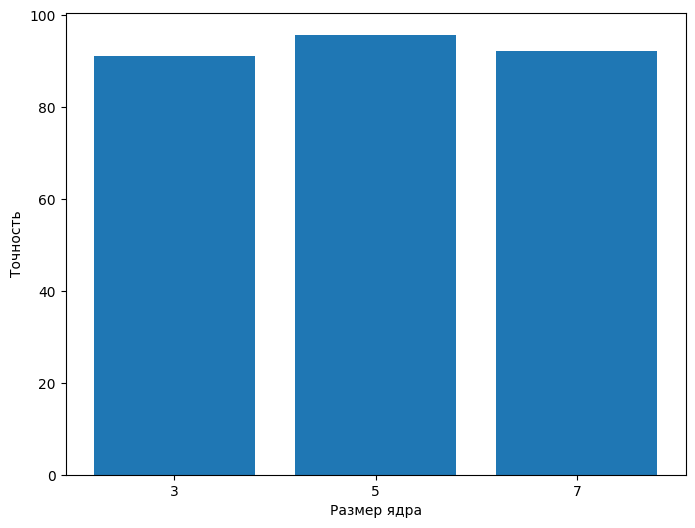

In [18]:
import matplotlib.pyplot as plt
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
# xlabel='Диапазон пороговых значений'
# ylabel='Точность'
# values = [85.89,84.45, 82.26, 84.43,82.11]
# labels = ['10-50', '10-150', '10-250','50-100','50-250']
xlabel='Размер ядра'
ylabel='Точность'
values = [91.16,95.72, 92.26]
labels = ['3', '5', '7']
plt.figure(figsize=(8, 6))
plt.bar(labels, values)

# Настройка графика
# plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Показ графика
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/diplom/model9.keras')
validDir = glob.glob("/content/drive/MyDrive/diplom/test/validWindows/*")
for img_path in validDir:
  img = tf.keras.utils.load_img(
      img_path, target_size=(IMG_SIZE, IMG_SIZE)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
      "This image most likely belongs to {} "
      .format(class_names[np.argmax(score)])
  )

# import numpy as np
# from PIL import Image

# def convert_from_cv2_to_image(img: np.ndarray) -> Image:
#     return Image.fromarray(img)
#     # return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))


# def convert_from_image_to_cv2(img: Image) -> np.ndarray:
#     # return np.asarray(img)
#     return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# model = tf.keras.models.load_model('/content/drive/MyDrive/diplom/modelWDSGrayscale1.keras')
# validDir = glob.glob("/content/drive/MyDrive/diplom/test/validWindows/*")
# for img_path in validDir:

#   img = tf.keras.utils.load_img(
#       img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode = "grayscale")

#   img_array = tf.keras.utils.img_to_array(img)
#   img_array = tf.expand_dims(img_array, 0) # Create a batch

#   predictions = model.predict(img_array)
#   score = tf.nn.softmax(predictions[0])
#   print(
#       "This image most likely belongs to {} with a {:.2f} percent confidence."
#       .format(class_names[np.argmax(score)], 100 * np.max(score))
#   )

1/1 [==============================] - 0s 131ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 35ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 41ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 37ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 85ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 26ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 24ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 22ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 26ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 23ms/step
This image most likely belongs to window 
1/1 [==============================] - 0s 22ms/step
This im

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
vidObj = cv2.VideoCapture('/content/drive/MyDrive/diplom/test/IMG_1861.MOV')
model = tf.keras.models.load_model('/content/drive/MyDrive/diplom/model9.keras')
    # Used as counter variable
count = 0

# checks whether frames were extracted
success = 1
# while success:
while count<10:
    # vidObj object calls read
    # function extract frames
    success, image = vidObj.read()
    # img = tf.keras.utils.load_img(
    #       img_path, target_size=(IMG_SIZE, IMG_SIZE)
    #   )
    image = resizeImage(64,64,image)
    # cv2_imshow(image)
    img_array = tf.keras.utils.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    clear_output()
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence. "
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

    # cv2_imshow(image)
    # sleep(0.5)
    # Saves the frames with frame-count
    # cv2.imwrite("video_frames/frame%d.jpg" % count, image)
    count += 1

KeyboardInterrupt: 

In [ ]:
print(len(X_TRAIN))
print(len(Y_TRAIN))
#print(X_TRAIN)

11979
11979


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_9 (Flatten)         (None, 9216)            

In [ ]:
model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(32, 32,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='same' ,input_shape=(16, 16,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 activation_2 (Activation)   (None, 16, 16, 32)       